<a href="https://colab.research.google.com/github/AbinReji07/Shoe-Image-Classification-using-CNN/blob/main/shoes_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
import os

In [2]:
os.listdir("/content/drive/MyDrive/shoe_data/train")

['adidas', 'nike', 'converse']

In [3]:
os.listdir("/content/drive/MyDrive/shoe_data/test")

['nike', 'converse', 'adidas']

In [4]:
datadir="/content/drive/MyDrive/shoe_data/train"

In [5]:
x_train=[]
y_train=[]
categories=["adidas","nike","converse"]
for i in categories:
  print("loading categories...",i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    #resizing
    img_resize=resize(img_array,(150,150,3))
    x_train.append(img_resize)
    y_train.append(categories.index(i))
  print("loaded categories",i)



loading categories... adidas
loaded categories adidas
loading categories... nike
loaded categories nike
loading categories... converse
loaded categories converse


In [6]:
dataddir="/content/drive/MyDrive/shoe_data/test"

In [7]:
x_test=[]
y_test=[]
categories=["adidas","nike","converse"]
for i in categories:
  print("loading categories...",i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    #resizing
    img_resize=resize(img_array,(150,150,3))
    x_test.append(img_resize)
    y_test.append(categories.index(i))
  print("loaded categories..",i)


loading categories... adidas
loaded categories.. adidas
loading categories... nike
loaded categories.. nike
loading categories... converse
loaded categories.. converse


In [8]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [9]:
x_train.shape

(711, 150, 150, 3)

In [10]:
y_train.shape

(711,)

In [11]:
x_test.shape

(711, 150, 150, 3)

In [12]:
y_test.shape

(711,)

In [13]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [14]:
model=Sequential()
#convolutional layer
model.add(Conv2D(16,(3,3),input_shape=(150,150,3),activation="relu"))
#pooling layer
model.add(MaxPool2D(2,2))
#pooling layer 2
model.add(MaxPool2D(2,2))
#flatten
model.add(Flatten())
#fullyconected layer
model.add(Dense(units=100,activation="relu"))
#output layer
model.add(Dense(units=3,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [16]:
model.fit(x_train,y_train,batch_size=30,epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.3225 - loss: 1.6874
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5184 - loss: 1.0584
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6566 - loss: 0.9305
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6920 - loss: 0.8076
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8138 - loss: 0.6426
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8776 - loss: 0.4789
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8826 - loss: 0.3882
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9564 - loss: 0.2582
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9701 - loss: 0.2160
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9848 - loss: 0.1323


In [17]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9701 - loss: 0.2131
0.9760900139808655
0.14966002106666565


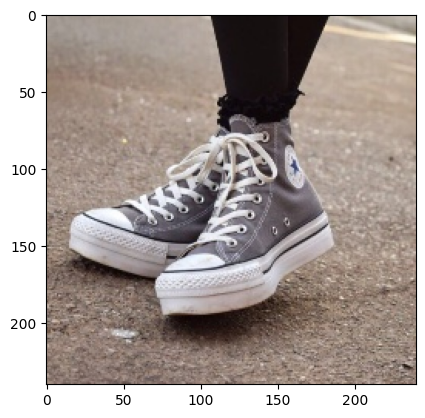

In [18]:
img="/content/drive/MyDrive/shoe_data/test/converse/1.jpg"
import matplotlib.pyplot as plt
img=imread(img)
plt.imshow(img)

In [19]:
img=resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [20]:
#converting 4-d
img=img.reshape(1,150,150,3)
img.shape

(1, 150, 150, 3)

In [21]:
y_new=model.predict(img)
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


array([[0.00277545, 0.956258  , 0.04096656]], dtype=float32)

In [22]:
ind=y_new.argmax()
ind
categories[ind]

'nike'